# Import Data

In [3]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

SFOmostExpensiveHoods=sfo_data.groupby(['neighborhood']).mean()
SFOmostExpensiveHoods_df=SFOmostExpensiveHoods.head(10)

SFneighborhoodData=sfo_data.groupby(['year','neighborhood']).mean().reset_index()

In [4]:
file_path2 = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path2)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [35]:
housing_units = sfo_data.groupby('year').mean()
MeanHousingUnits=housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)
minimum=MeanHousingUnits['housing_units'].min()
maximum=MeanHousingUnits['housing_units'].max()
standard=MeanHousingUnits['housing_units'].std()

In [36]:
def housing_units_per_year():
    HUPU_fig=plt.figure()
    MeanHousingUnits['housing_units'].plot.bar(ylim =(minimum-5000, maximum+5000),title="Mean Housing Units in San Francisco from 2010 to 2016",figsize=(15,6))
    plt.close()
    return pn.pane.Matplotlib(HUPU_fig)

Matplotlib(Figure)
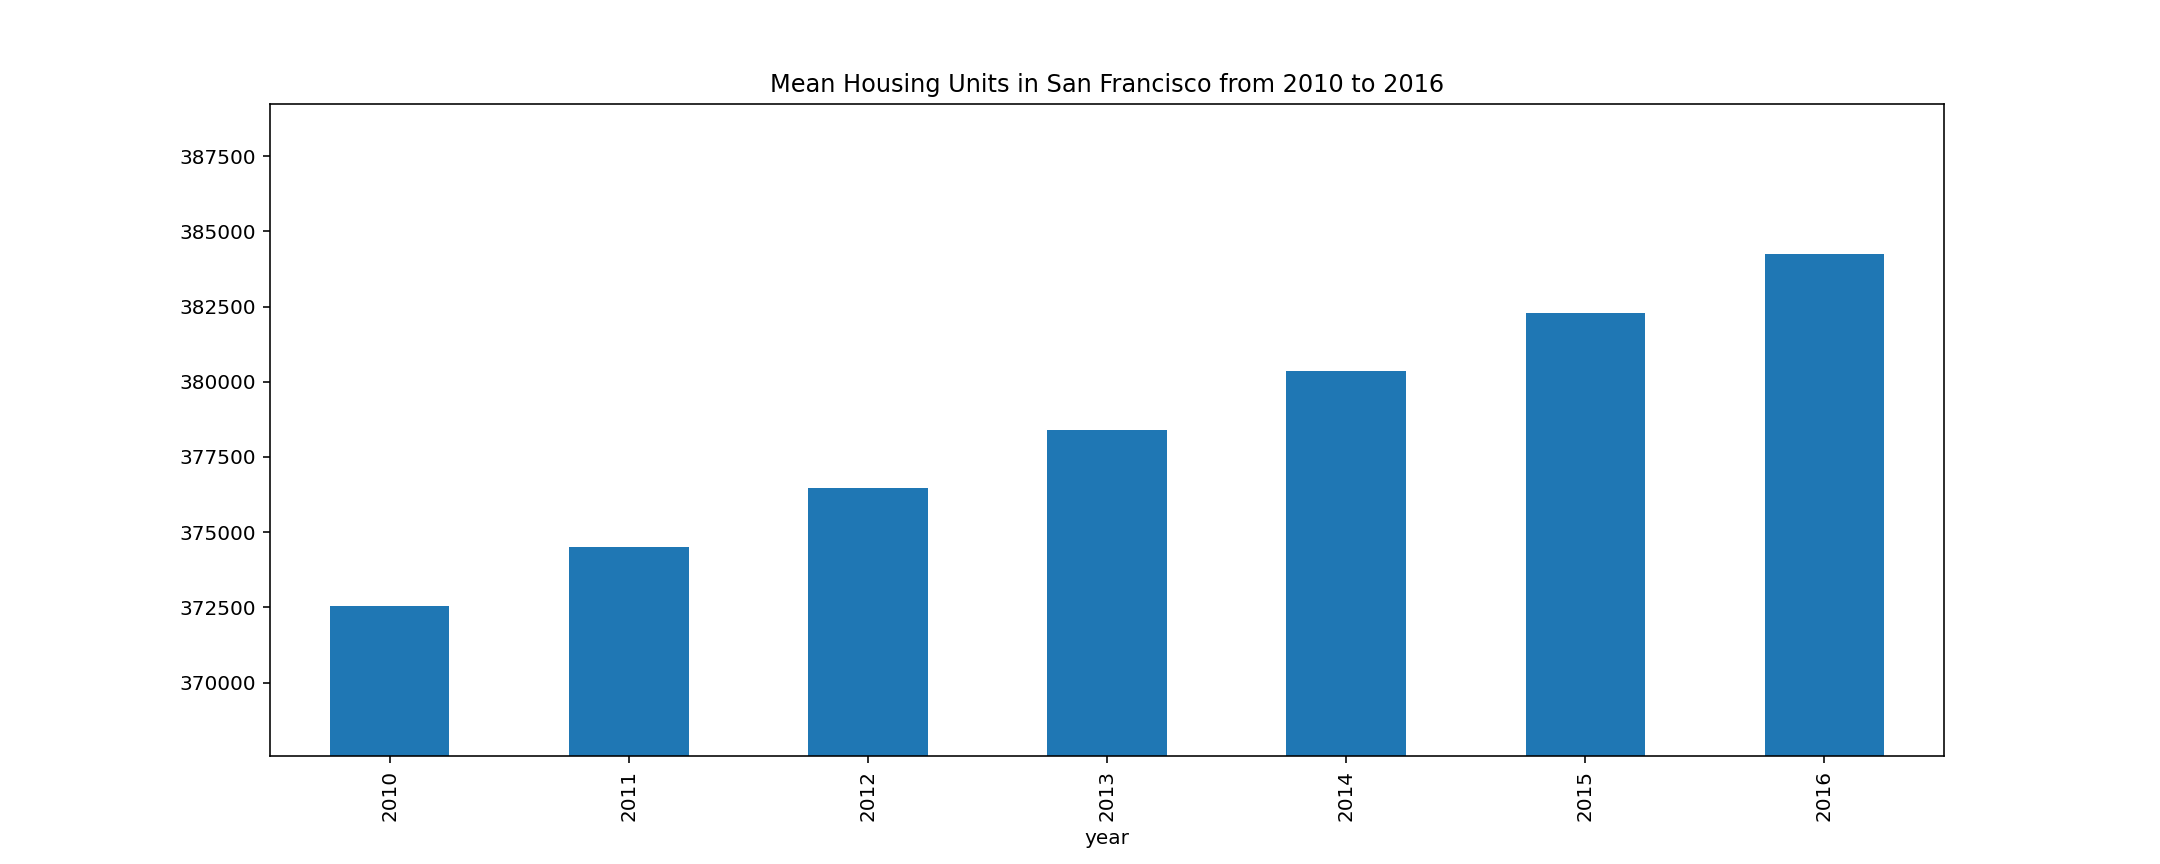

In [37]:
housing_units_per_year()

In [41]:
AverageHousingCost = sfo_data.groupby(['year']).mean().drop(['housing_units'], axis=1)

In [42]:

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    gross_rent_fig=plt.figure()
    #AverageHousingCost = sfo_data.groupby(['year']).mean().drop(['housing_units'], axis=1)
    a_plot=AverageHousingCost['gross_rent'].plot.line(title="Average Monthly Rent",figsize=(15,6), color='red')

    title_obj=a_plot.set_title("Average Gross Rent in San Francisco Per Year")
    plt.setp(title_obj, color='r')
    yaxis=a_plot.set_ylabel("Rent Amount")
    plt.setp(yaxis, color='r')
    plt.close()
    return pn.pane.Matplotlib(gross_rent_fig)

Matplotlib(Figure)
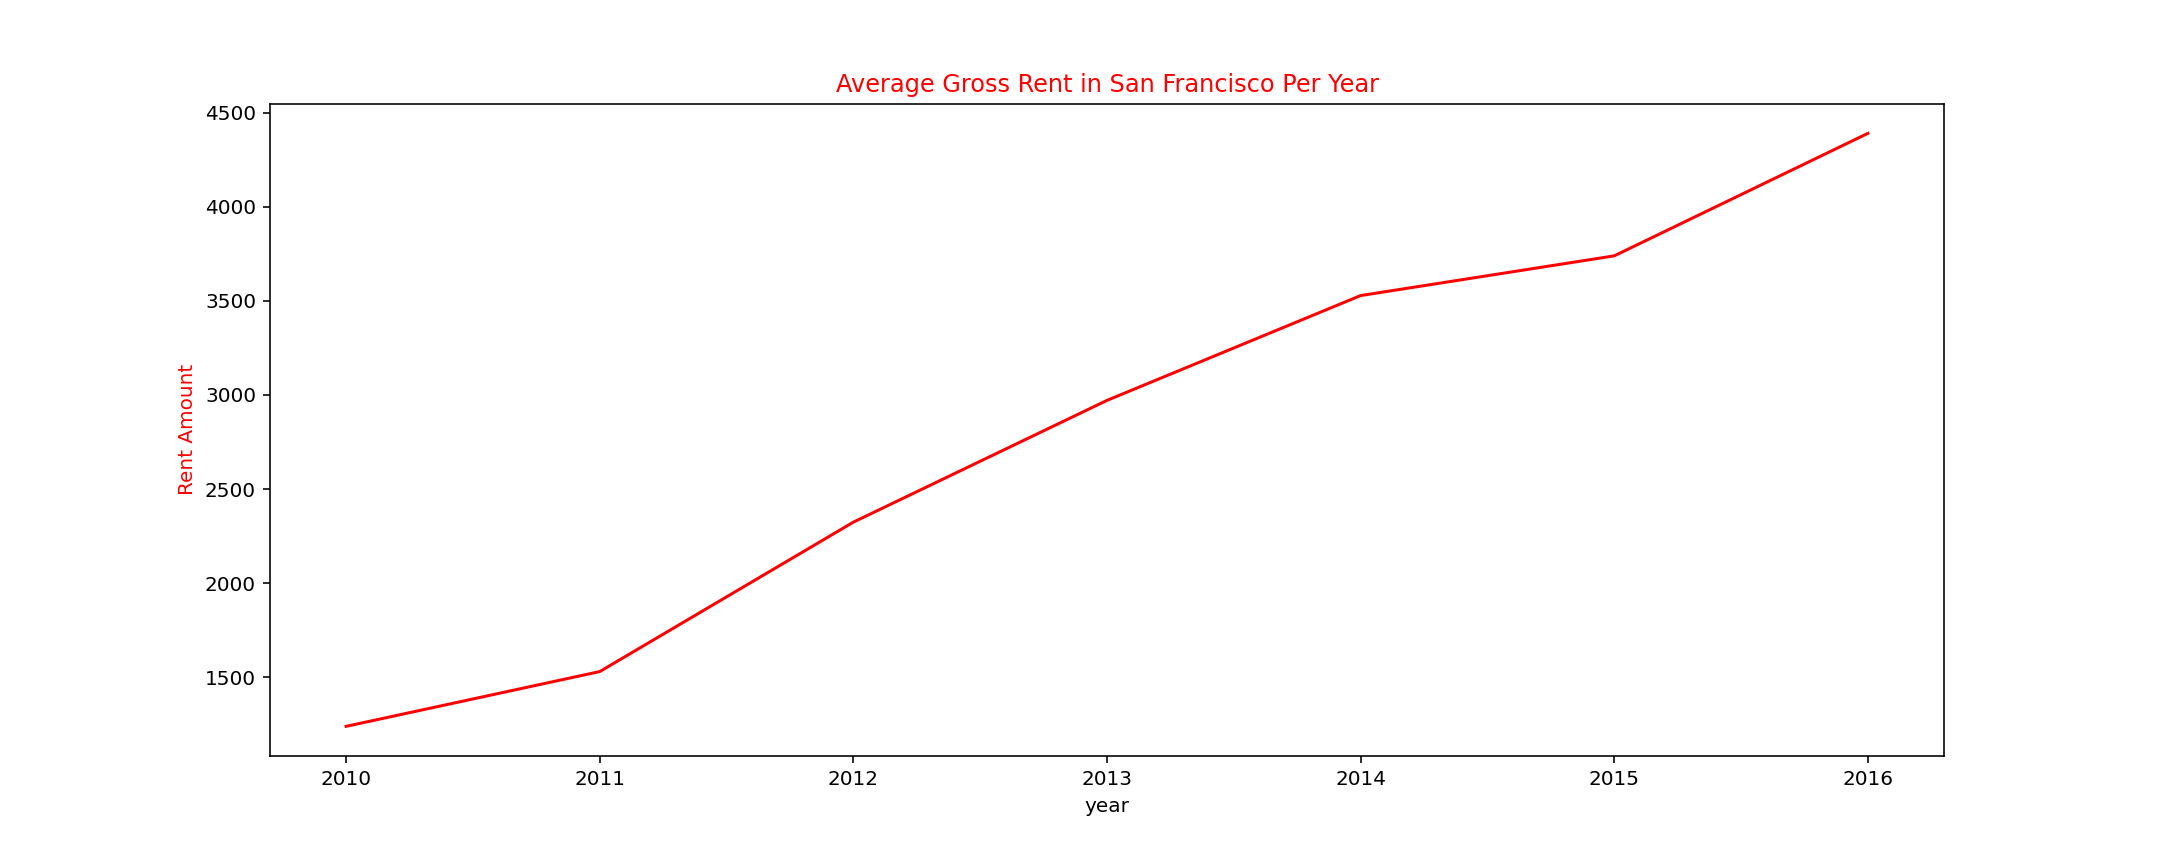

In [43]:
average_gross_rent()

In [44]:
def average_sales_price():
    """Average Sales Price Per Year."""
    sales_price_fig=plt.figure()
    Average_SalesPrice=AverageHousingCost['sale_price_sqr_foot'].plot.line(title="Average Price per SqFt by Year",figsize=(15,6), color='m')
    b_plot=Average_SalesPrice
    title_obj=b_plot.set_title("Average Sales Price Per Year")
    plt.setp(title_obj, color='r')
    yaxis=b_plot.set_ylabel("Price Per Sq Foot")
    plt.setp(yaxis, color='r')
    plt.close()
    return pn.pane.Matplotlib(sales_price_fig)


Matplotlib(Figure)
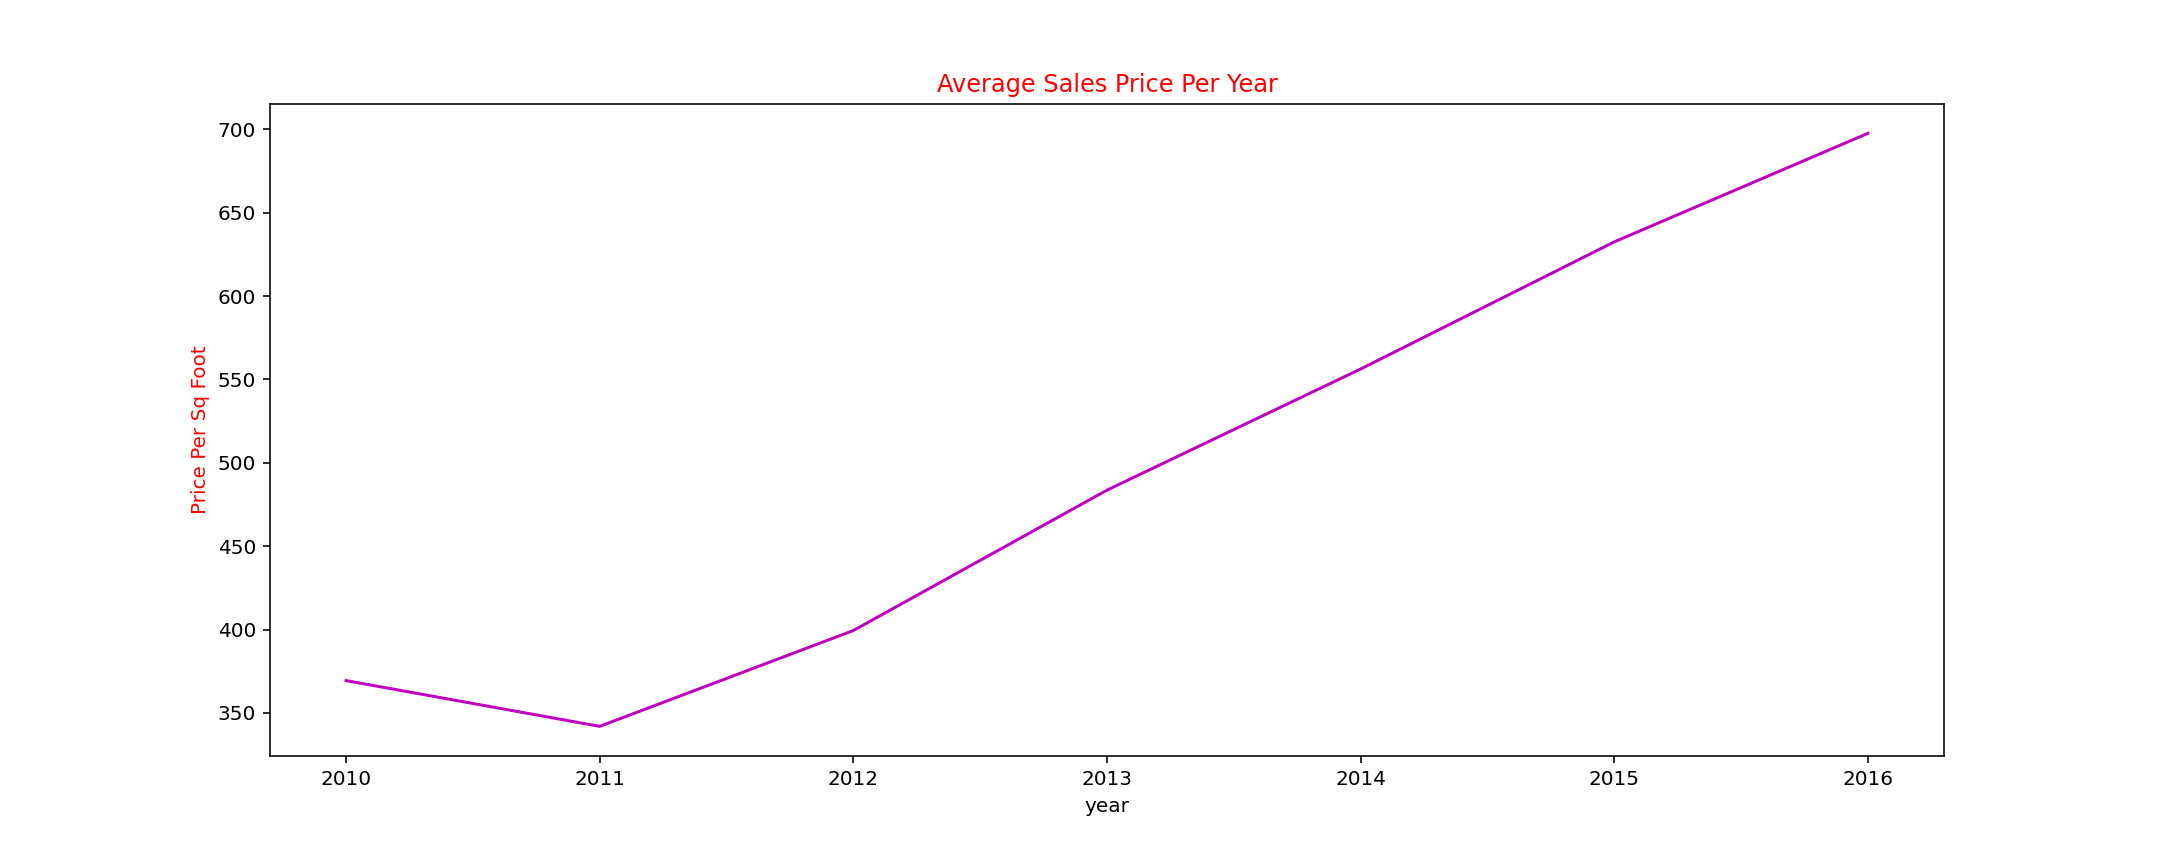

In [45]:
average_sales_price()

In [46]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    
    SFneighborhoodData=sfo_data.groupby(['year','neighborhood']).mean().reset_index()
    AvgPriceSqFt_plot = SFneighborhoodData.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel= 'Year',
    ylabel= 'Price per Sq Ft',
    title='Average Price per Sq Ft in San Francisco from 2010 to 2016',
    groupby='neighborhood',
    width=600
).opts(yformatter='%0f')
    
    AvgPriceSqFt_plot = SFneighborhoodData.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel= 'Year',
    ylabel= 'Price per Sq Ft',
    title='Average Price per Sq Ft in San Francisco from 2010 to 2016',
    groupby='neighborhood',
    width=600
).opts(yformatter='%0f')

    return (AvgPriceSqFt_plot)

In [47]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [48]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    SFOmostExpensiveHoods=sfo_data.groupby(['neighborhood']).mean()
    SFOmostExpensiveHoods.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
    SFOmostExpensiveHoods.reset_index(inplace=True)
    
    MostExpensiveNeighborhoods_plot = SFOmostExpensiveHoods_df.hvplot.bar(x='neighborhood',
                                y='sale_price_sqr_foot',
                                rot=45,
                                #ylim=[600,1000],
                                title='Top 10 Most Expensive Neighborhoods')

    return (MostExpensiveNeighborhoods_plot)

In [49]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [50]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    AvgMonthlyRent_plot = SFneighborhoodData.hvplot.bar(
    x='year',
    y=['gross_rent','sale_price_sqr_foot'],
    xlabel= 'Year',
    ylabel= 'Average Monthly Rent',
    title='Average Price per Sq ft vs Average Monthly Rent in San Francisco from 2010 to 2016',
    groupby='neighborhood',
    rot=45,
    width=800
).opts(yformatter='%0f')


    return (AvgMonthlyRent_plot)

In [51]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [52]:
    
#The rest of these were optional
#def parallel_coordinates():
 # Parallel Coordinates Plot.



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [54]:
# Create a Title for the Dashboard
# YOUR CODE HERE!

title = '#San Francisco Real Estate Analysis for 2010-2016'
#welcome_tab = pn.Row(pn.Column(title), neighborhood_map())
welcome_tab = pn.Row(pn.Column(title))

market_analysis_row = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())


neighborhood_analysis_tab = pn.Column(
    top_most_expensive_neighborhoods(),
    most_expensive_neighborhoods_rent_sales()
                                     )
# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
SanFran_dashboard = pn.Tabs(("Welcome", welcome_tab), 
("Yearly Market Analysis", market_analysis_row),
("Neighborhood Analysis", neighborhood_analysis_tab))
#("Interactive Market Analysis by Neighborhood", interactive_tab))

## Serve the Panel Dashboard

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
    [1] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] HoloViews(Bars)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
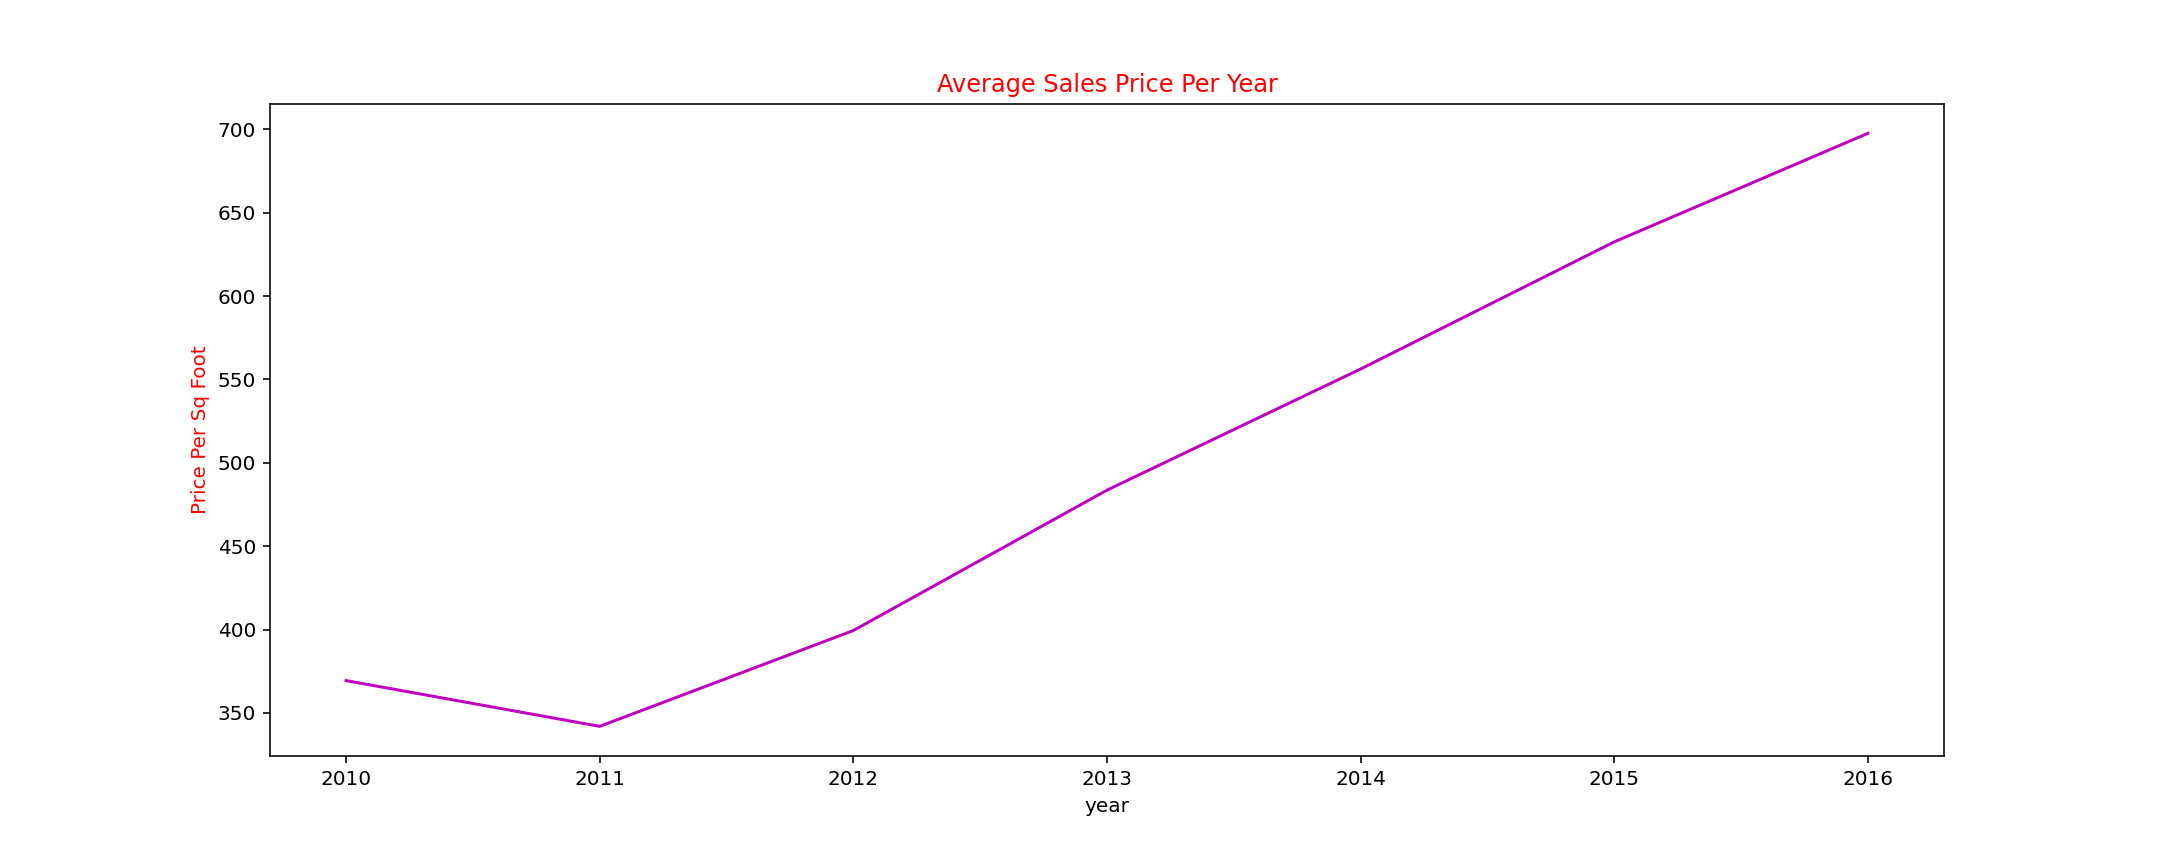
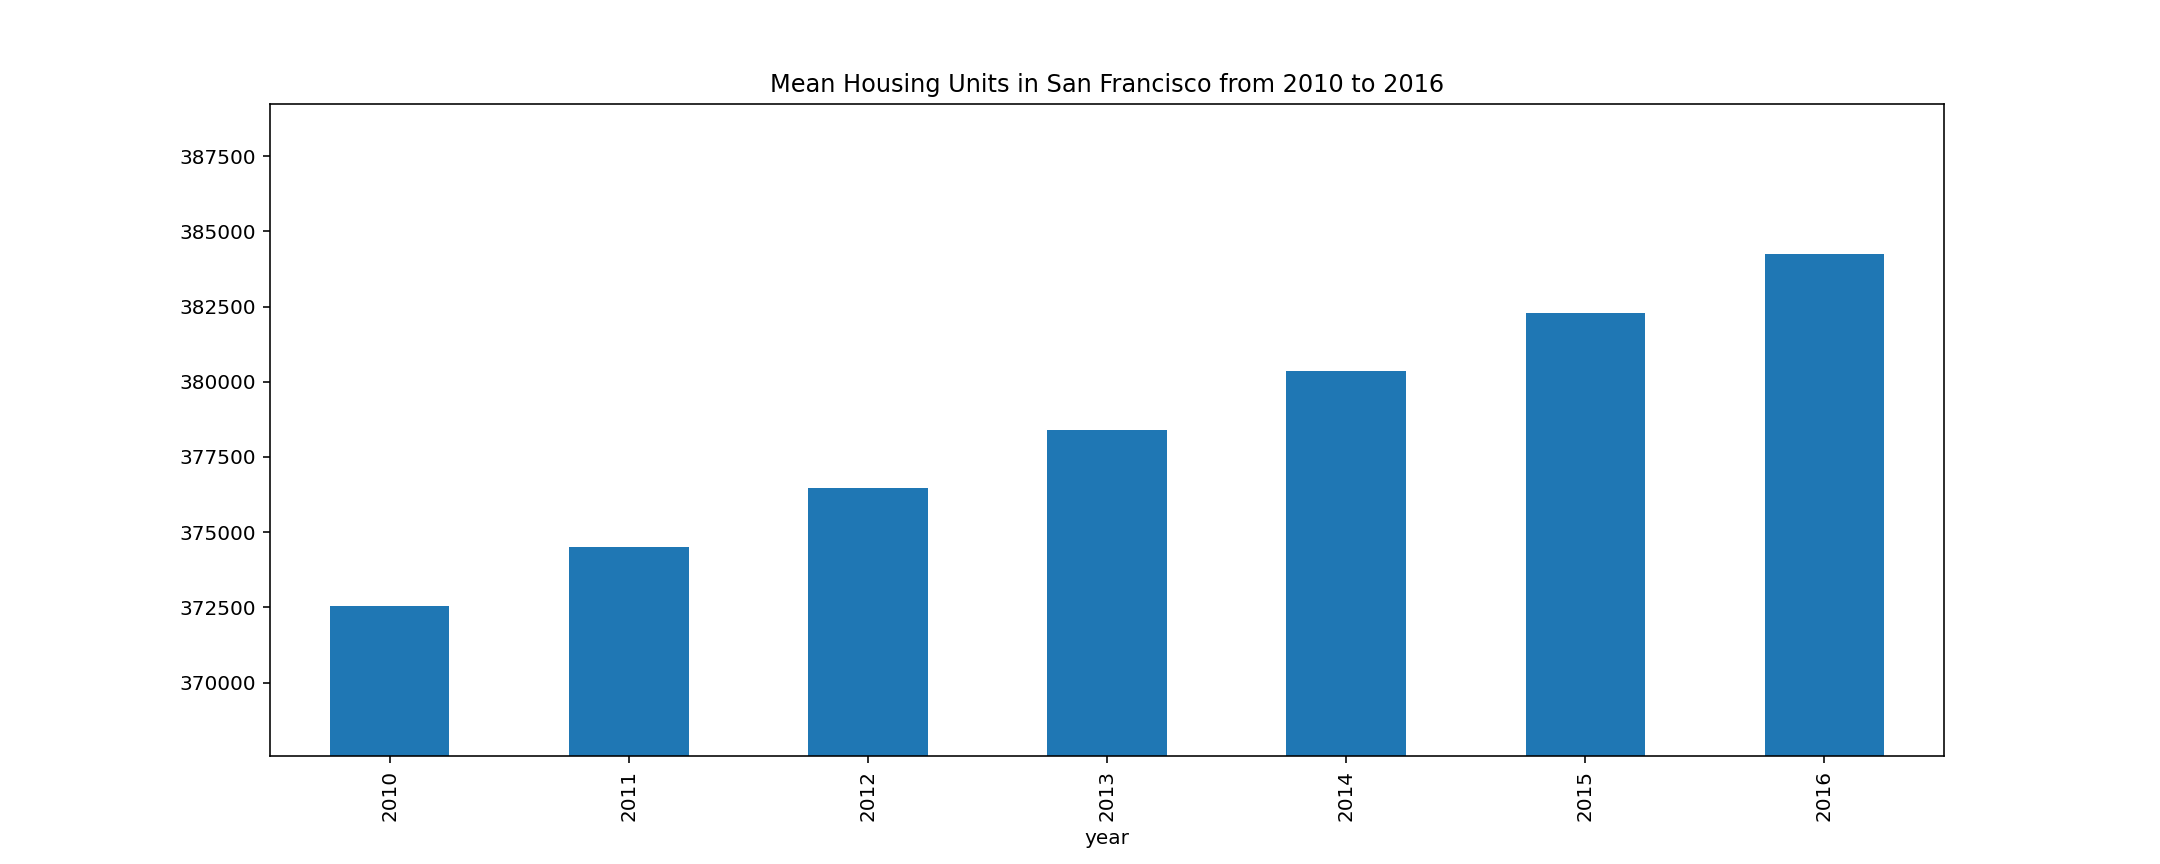
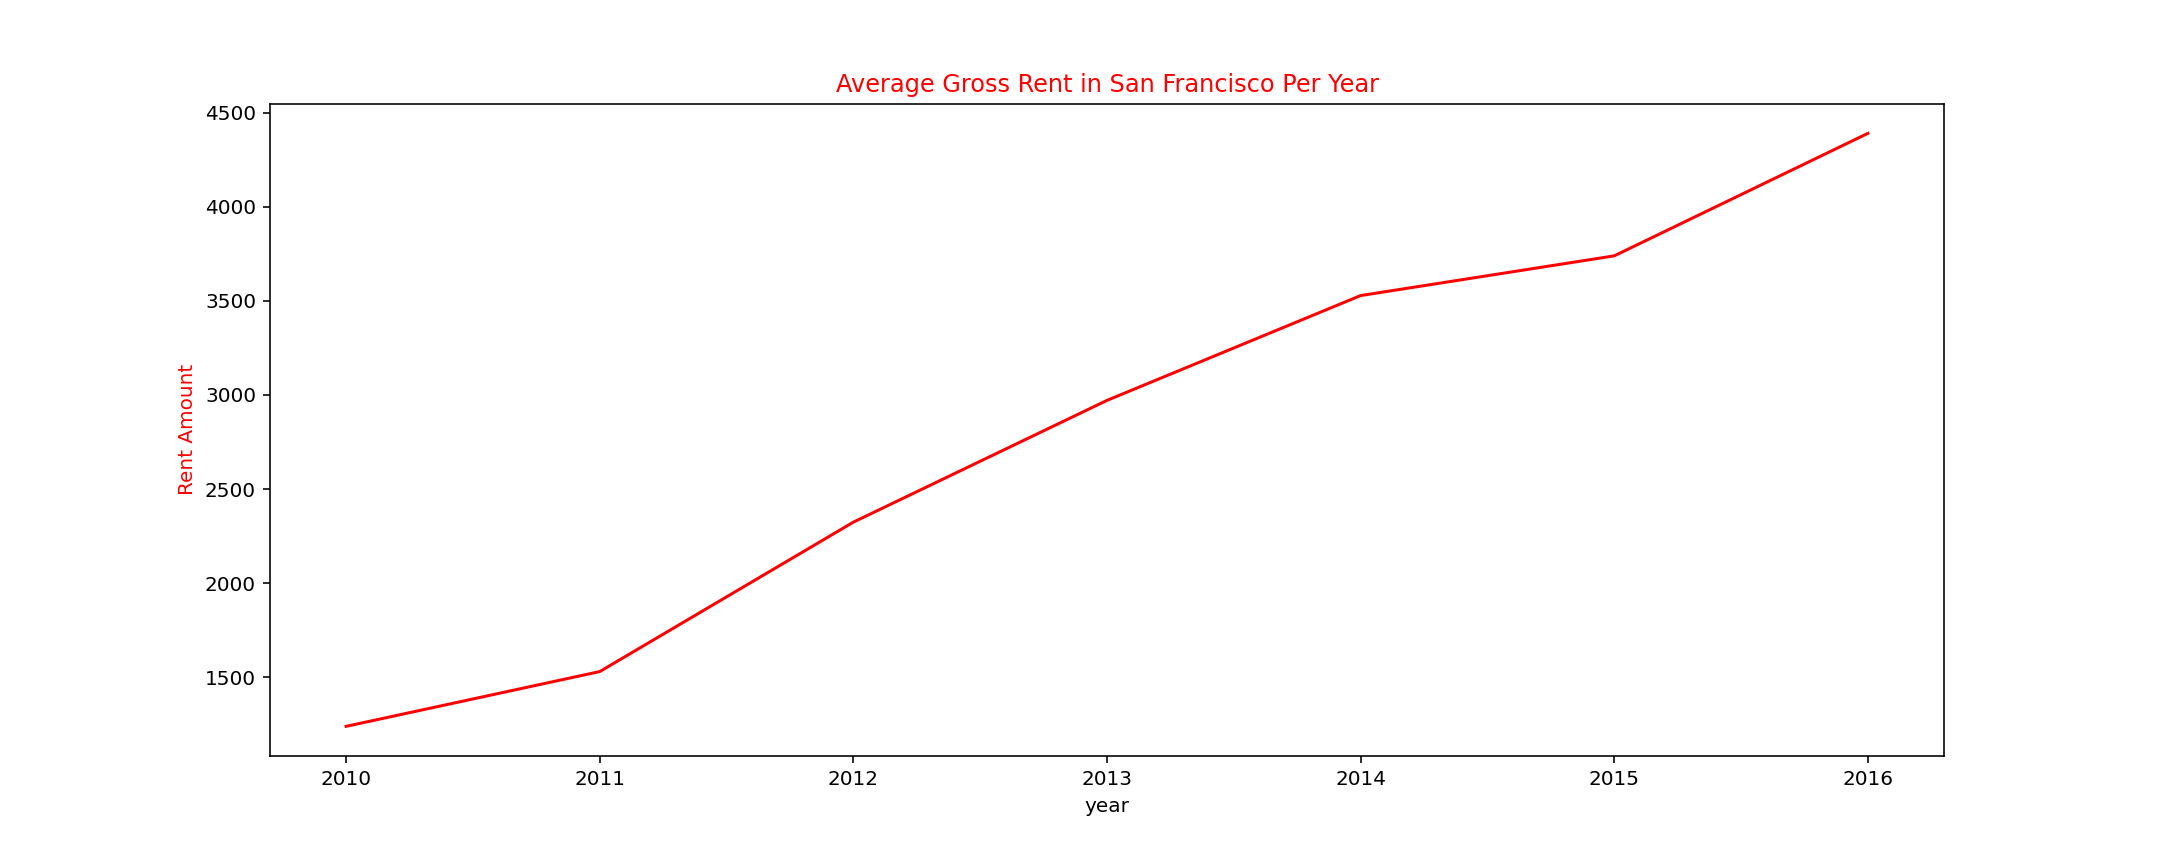

In [55]:
# Serve the# dashboard
# YOUR CODE HERE!
SanFran_dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()